## Notes

* Guys I see Motreal has very few businesses and few reviews. You can see that at the histograms. Probably we should consider changing or at least take that into account for our analysis - Andreas
* Changed the cities to have enough businesses

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy
import re
import pylab

In [2]:
business_df= pd.read_csv("data/csv/yelp_academic_dataset_business.csv")
review_df= pd.read_csv("data/csv/yelp_academic_dataset_review.csv")

In [3]:
#======Part 2======
city1="Las Vegas"
city2="Toronto"
city3="Montreal"
#==================

#======Part 3======
selected_business="Restaurants"
#==================

#======Part 4======
analyse_city=True   #choose to analyse a city or a state
#==================


if analyse_city:
    selected_city="Las Vegas"
else:
    selected_state="NV"

print("Number of Businesses")
print(city1,":",len(business_df[business_df.city==city1]))
print(city2,":",len(business_df[business_df.city==city2]))
print(city3,":",len(business_df[business_df.city==city3]))

Number of Businesses
Las Vegas : 22892
Toronto : 14540
Montreal : 201


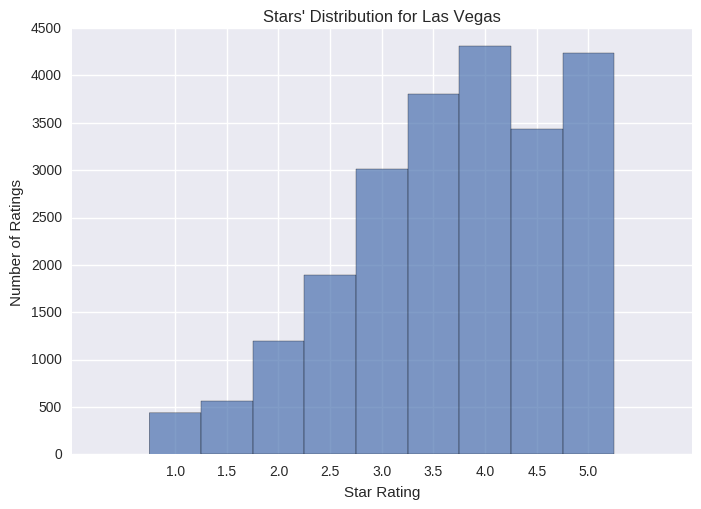

In [4]:
city1_df = business_df[business_df.city == city1]

n_total, bins, patch = plt.hist(city1_df.stars, bins=np.arange(1,6,0.5), alpha=0.7,align="left",normed=False,histtype="bar")
plt.xticks(np.arange(1,5.5,0.5))
plt.title("Stars' Distribution for {}".format(city1))
plt.xlabel('Star Rating')
plt.ylabel('Number of Ratings')
plt.show()

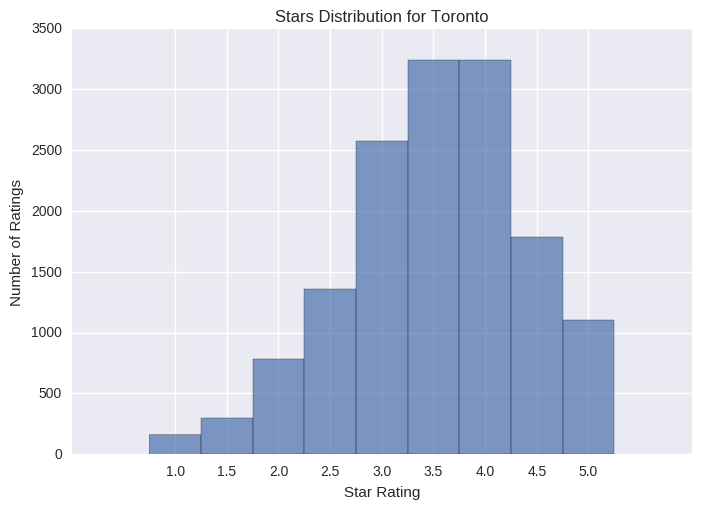

In [5]:
city2_df = business_df[business_df.city ==city2]

n_total, bins, patch = plt.hist(city2_df.stars, bins=np.arange(1,6,0.5), alpha=0.7,align="left",normed=False,histtype="bar")
plt.xticks(np.arange(1,5.5,0.5))
plt.title("Stars Distribution for {}".format(city2))
plt.xlabel('Star Rating')
plt.ylabel('Number of Ratings')
plt.show()

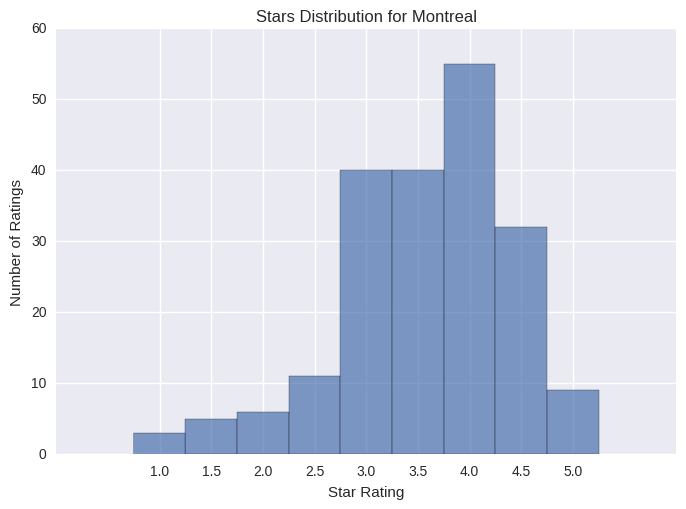

In [6]:
city3_df = business_df[business_df.city == city3]

n_total, bins, patch = plt.hist(city3_df.stars, bins=np.arange(1,6,0.5), alpha=0.7,align="left",normed=False,histtype="bar")
plt.xticks(np.arange(1,5.5,0.5))
plt.title("Stars Distribution for {}".format(city3))
plt.xlabel('Star Rating')
plt.ylabel('Number of Ratings')
plt.show()

In [7]:
stat_prop_stars_cities=pd.DataFrame({city1:list(scipy.stats.describe(city1_df.stars)),
                                     city2:list(scipy.stats.describe(city2_df.stars)),
                                     city3:list(scipy.stats.describe(city3_df.stars))
                                    },index=["nobs","min-max","mean","variance","skewness","kurtosis"])
stat_prop_stars_cities

,Las Vegas,Montreal,Toronto
nobs,22892,201,14540
min-max,"(1.0, 5.0)","(1.0, 5.0)","(1.0, 5.0)"
mean,3.69843,3.57711,3.51575
variance,1.02516,0.690274,0.758642
skewness,-0.567735,-0.750828,-0.400705
kurtosis,-0.318652,0.623946,-0.093702


In [8]:
print("There are",len(business_df[business_df.categories.isnull()]),"businesses that have no business category")

There are 325 businesses that have no business category


In [9]:
diff_categories=[]
for i in business_df[business_df.categories.notnull()].categories:
    
    current_category=re.findall(r"[a-zA-Z0-9_/()\&\-<>?\*`~!@#$%^\+{};:| ]+[a-zA-Z0-9_/()\&\-<>?\*`~!@#$%^\+{};:| ]+",i)
    diff_categories+=current_category

diff_categories=set(diff_categories)

print("There are",len(diff_categories),"different business categories")

There are 1192 different business categories


In [10]:
selected_category_indexes=[]
for index in business_df[business_df.categories.notnull()].index:
    if re.search(r"\b{0}\b".format(selected_business),business_df.ix[index,"categories"]):
        selected_category_indexes.append(index)

selected_businesses=business_df.ix[selected_category_indexes]
print("There are",len(business_df.ix[selected_category_indexes]),selected_business,"businesses","in the whole dataset")

There are 48485 Restaurants businesses in the whole dataset


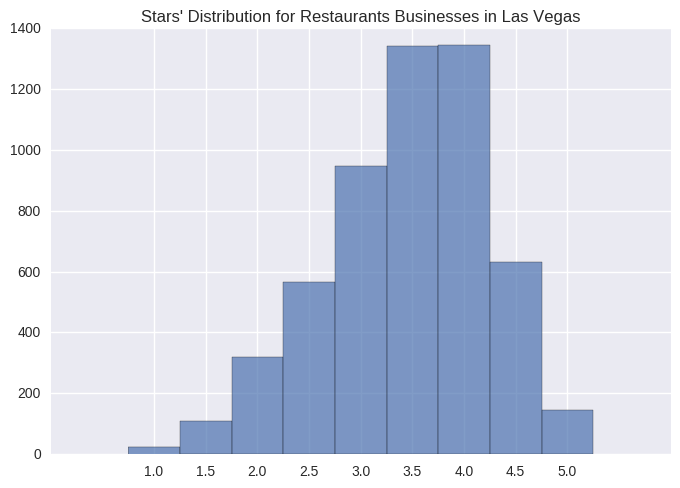

In [11]:
selected_businesses_city1 = selected_businesses[selected_businesses.city==city1]

n_total, bins, patch = plt.hist(selected_businesses_city1.stars, bins=np.arange(1,6,0.5), alpha=0.7,align="left",normed=False,histtype="bar")
plt.xticks(np.arange(1,5.5,0.5))
plt.title("Stars' Distribution for {} Businesses in {}".format(selected_business,city1))
plt.show()

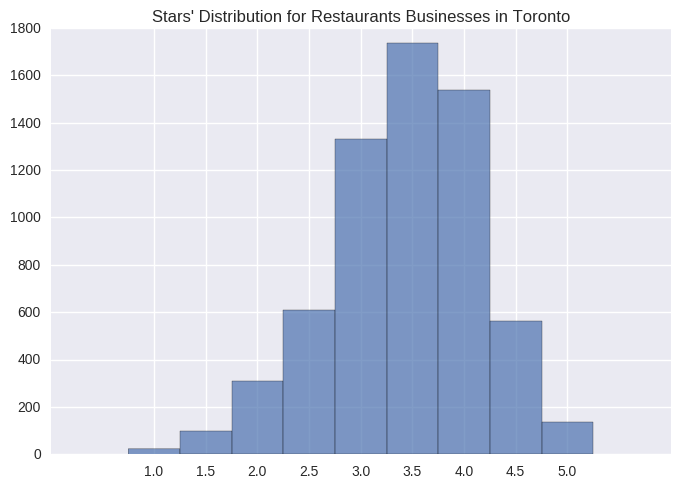

In [12]:
selected_businesses_city2 = selected_businesses[selected_businesses.city==city2]

n_total, bins, patch = plt.hist(selected_businesses_city2.stars, bins=np.arange(1,6,0.5), alpha=0.7,align="left",normed=False,histtype="bar")
plt.xticks(np.arange(1,5.5,0.5))
plt.title("Stars' Distribution for {} Businesses in {}".format(selected_business,city2))
plt.show()

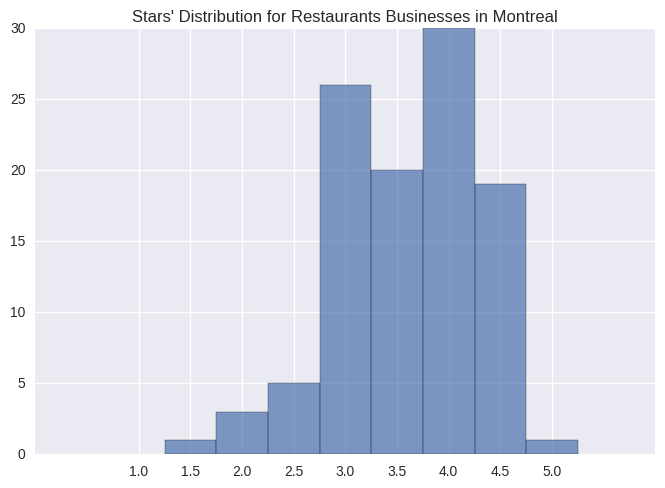

In [13]:
selected_businesses_city3 = selected_businesses[selected_businesses.city==city3]

n_total, bins, patch = plt.hist(selected_businesses_city3.stars, bins=np.arange(1,6,0.5), alpha=0.7,align="left",normed=False,histtype="bar")
plt.xticks(np.arange(1,5.5,0.5))
plt.title("Stars' Distribution for {} Businesses in {}".format(selected_business,city3))
plt.show()

In [14]:
selected_businesses_stat_prop_stars_cities=pd.DataFrame({city1:list(scipy.stats.describe(selected_businesses_city1.stars)),
                                     city2:list(scipy.stats.describe(selected_businesses_city2.stars)),
                                     city3:list(scipy.stats.describe(selected_businesses_city3.stars))
                                    },index=["nobs","min-max","mean","variance","skewness","kurtosis"])
selected_businesses_stat_prop_stars_cities

,Las Vegas,Montreal,Toronto
nobs,5431,105,6347
min-max,"(1.0, 5.0)","(1.5, 5.0)","(1.0, 5.0)"
mean,3.44872,3.60476,3.42745
variance,0.625409,0.479304,0.534327
skewness,-0.448618,-0.466933,-0.408281
kurtosis,-0.128254,-0.161366,0.123253


### Part 4

In [15]:
if analyse_city:
    review_selected_city=review_df[review_df.business_id.isin(business_df[business_df.city==selected_city].business_id)]
    review_selected_region=review_selected_city
    selected_region=selected_city
else:
    review_selected_state=review_df[review_df.business_id.isin(business_df[business_df.state==selected_state].business_id)]
    review_selected_region=review_selected_state
    selected_region=selected_state

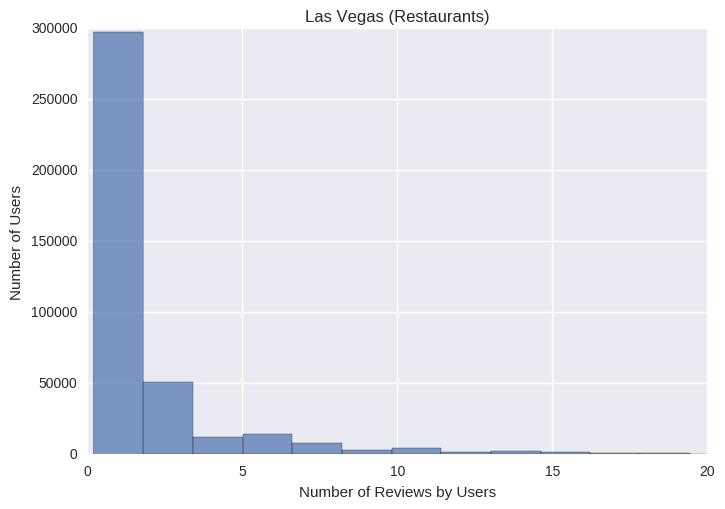

In [16]:
n_total, bins, patch = plt.hist(review_selected_region.user_id.value_counts(),bins=1000,alpha=0.7,align="left",normed=False,histtype="bar")
plt.title("{} ({})".format(selected_region,selected_business))
pylab.xlim([0,20])
plt.xlabel('Number of Reviews by Users')
plt.ylabel('Number of Users')
plt.show()

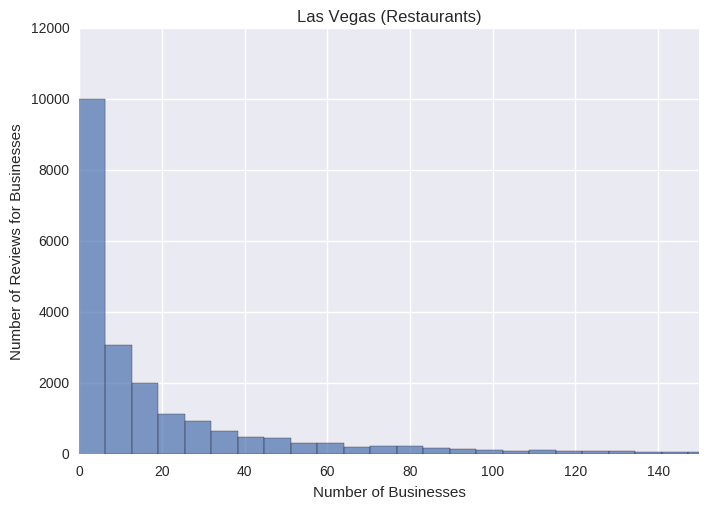

In [17]:
n_total, bins, patch = plt.hist(review_selected_region.business_id.value_counts(),bins=1000,alpha=0.7,align="left",normed=False,histtype="bar")
plt.title("{} ({})".format(selected_region,selected_business))
pylab.xlim([0,150])
plt.xlabel('Number of Businesses')
plt.ylabel('Number of Reviews for Businesses')
plt.show()